In [1]:
import pandas as pd
import numpy as np

In [21]:
# edit path in case code needs to be run
df = pd.read_csv('/Users/pallavibanerjee/Desktop/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [16]:
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


To calculate the average order value, we take the sum total of the order amount at each store, add them up anf then divide it by thr total number of orders places across all 100 shops. The code below executes this.

In [62]:
N = sum(list(df.groupby('shop_id')['order_amount'].sum())) # numerator, total valuation of all orders
D = sum(list(df.groupby('shop_id')['order_id'].count())) # denominator, total number of orders
AOV = N/D
print('The AOV is,', AOV)

The AOV is, 3145.128


Since the value we are getting is infact too high given that there are just sneakers, we must explore to data to undertsnd if there are any issues/oytliers.

DATA EXPLORATION

In [ ]:
df['shop_id'].unique()

In [44]:
min(df['created_at'])

'2017-03-01 0:08:09'

In [45]:
max(df['created_at'])

'2017-03-30 9:55:00'

In [55]:
min(df['order_amount'])

90

The minimum amount of 90 makes sense to me, this does not look like an outlier.

In [56]:
max(df['order_amount'])

704000


The maximum amount seems a bit off and could be for the following reasons:
    1. Typo in data entry
    2. Just a very rich customer, and hence an outlier.
 
In our anlysis we should ideally leave this data point behins if infact this value is one of it's kind. To check that, a visualization of the data is a good idea.

<AxesSubplot:>

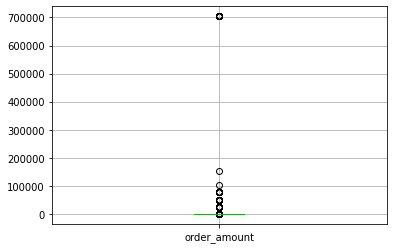

In [57]:
df.boxplot(column=['order_amount'])

Thus, it is a good idea to remove this data point, as we can see most of the values are less than 200000

In [ ]:
A good idea to evaluate this by ignoring this outlier is by incorporating 

In [59]:
df2 = df[(df['order_amount'] < 200000) ]
N = sum(list(df2.groupby('shop_id')['order_amount'].sum())) # numerator, total valuation of all orders
D = sum(list(df2.groupby('shop_id')['order_id'].count())) # denominator, total number of orders
AOV = N/D


In [60]:
print('The AOV is,', AOV)


The AOV is, 754.0919125025085


### ANSWERS:

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

The error was the outlier which was not removed while Calculating the AOV.
Better way to approach is to first explore the data to understand issues with the data quality or the trends in the data.
One way to go further is by either removing the outlier or using more robust techniques. However, in this case, the outlier removal makes more sense to me.

2. What metric would you report for this dataset?

I would report the average order values over the thirty month period but with the outlier removed.
Other lower end values seem to make sense to me, as sneakers may cost that less i.e, 90







3. What is its value?

The AOV is, 754.0919125025085